# **<h3 align="center">Data Mining 2024-25</h3>**
## **<h3 align="center">Customer Segmentation - ABCDEats Inc.</h3>**


**Group 10 members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import the Dataset](#import_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Coherence Checking](#coherence_checking)
        * [4.5.1. Minors Customers](#sub_section_4_5_1)
        * [4.5.2. Is_chain variable](##sub_section_4_5_2)
        * [4.5.3. CUI_Asian vs Japonese, Chinese](#sub_section_4_5_3)
        * [4.5.4. Last_order and First_order consistency](#sub_section_4_5_4)
        * [4.5.5. Sum DOWs vs sum HRs](##sub_section_4_5_5)
        * [4.5.6. Total Orders and Vendor Count consistency ](#sub_section_4_5_6)
        * [4.5.7. Total rows with inconsistencies](#sub_section_4_5_7)
    * [4.6. Visualizations](#visualizations)
    * [4.7. Correlation Matrix](#correlation_matrix)

### below just copied from Xana
* [4.8. Outliers](#outliers)
* [5. Feature Engineering](#feature_engineering)
    * [5.1. Total Cuisine Spending](#total_cuisine_spending)
    * [5.2. Weekend and Weekday Orders](#weekend_and_weekday_orders)
    * [5.3. Generation](#generation)
    * [5.4. Hourly Orders Aggregation](#hourly_orders_aggregation)
    * [5.5. Healthiness Index](#healthiness_index)
    * [5.6. Last Promotion Indicator](#last_promotion_indicator)

### below  its features created by Marco

* [5. Feature Engineering](#feature_engineering)
    * [5.7. Vendor Diversity](#Vendor_Diversity)
    * [5.8. Average Daily Orders](#Average_Daily_Orders)
    * [5.9. Order Recency](#Order_Recency)
    * [5.10. Average Order Value](#Average_Order_Value)

# 1. Import the Libraries <a class="anchor" id="import_libraries"></a>
[Back to ToC](#toc)<br>

For tasks involving data manipulation, numerical calculations, visualization, and machine learning, imports of libraries like the mentioned in the below cell are crucial. These libraries offer the required functions and tools for preprocessing data, pattern analysis, consumer segmentation, and development of focused marketing campaigns.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import warnings
warnings.filterwarnings("ignore")

# 2. Import the Dataset <a class="anchor" id="import_dataset"></a>
[Back to ToC](#toc)<br>

In this section, we import the datasets and set the customer_id as the index column in DM2425_ABCDEats_DATASET.

In [54]:
df_original = pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv", index_col="customer_id")
df_original.head().T

customer_id,1b8f824d5e,5d272b9dcb,f6d1b2ba63,180c632ed8,4eb37a6705
customer_region,2360,8670,4660,4660,4660
customer_age,18.0,17.0,38.0,NaN,20.0
vendor_count,2,2,1,2,2
product_count,5,2,2,3,5
is_chain,1,2,2,1,0
first_order,0.0,0.0,0.0,0.0,0.0
last_order,1,1,1,2,2
last_promo,DELIVERY,DISCOUNT,DISCOUNT,DELIVERY,-
payment_method,DIGI,DIGI,CASH,DIGI,DIGI
CUI_American,0.0,12.82,9.2,0.0,14.57


In [55]:
df_original.tail().T

customer_id,f4e366c281,f6b6709018,f74ad8ce3f,f7b19c0241,fd40d3b0e0
customer_region,8670,8670,8670,8670,4660
customer_age,30.0,NaN,24.0,34.0,30.0
vendor_count,1,1,1,1,1
product_count,1,1,1,1,1
is_chain,1,0,1,0,0
first_order,NaN,NaN,NaN,NaN,NaN
last_order,0,0,0,0,0
last_promo,FREEBIE,DELIVERY,-,DISCOUNT,-
payment_method,DIGI,DIGI,DIGI,DIGI,CASH
CUI_American,0.0,18.04,0.0,0.0,0.0


# 3. Description of the Dataset’s Structure<a class="anchor" id="dataset_structure"></a>
[Back to ToC](#toc)<br>

The <span style="color:Blue"> info()  </span> method prints information about the DataFrame. Using this method we can also see that there are some missing values.
*Notes*:
- customer_age has some missing values
- first_order has some missing values
- HR_0 has some missing values

In [56]:
df_original.shape

(31888, 55)

In [57]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

Notes:
- customer age should be a integer
- first order is number of days so should be a integer
- HR_0: convert to int

The <span style="color:Blue"> describe()  </span> method  is used for calculating some statistical data. The features: *customer_name*, *customer_gender*, and *customer_birthdate* don"t have any statistical data since they"re categorical features.

In [58]:
df_original.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.51,7.16,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.10,2.77,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.67,6.96,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.82,3.98,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.48,24.11,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.68,23.23,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.88,11.65,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.96,23.56,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.30,8.48,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.80,6.43,0.0,0.0,0.0,0.00,326.10


As we can see the HR_0 is always equal to zero, so we can delete this features. 

In [59]:
df_original.describe(include="object")

,customer_region,last_promo,payment_method
count,31888,31888,31888
unique,9,4,3
top,8670,-,CARD
freq,9761,16748,20161


In [60]:
df_original["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [61]:
df_original["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

Lets replace the - for None.

In [62]:
df_original["payment_method"].value_counts()

payment_method
CARD    20161
DIGI     6101
CASH     5626
Name: count, dtype: int64

<a id = "exploration"></a>

# 4. Exploring the Dataset <a class="anchor" id="a"></a>
[Back to ToC](#toc)<br>

In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don"t offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.

> ## 4.1. Constant features <a class="anchor" id="constant_features"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

The <span style='color:Blue'> var() </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0).

In [63]:
variances = df_original.var(numeric_only=True)
variances[variances == 0]

HR_0    0.0
dtype: float64

In [64]:
df_no_hr0 = df_original.drop("HR_0", axis = 1)

> ## 4.2. Duplicates <a class="anchor" id="duplicates"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

With the <span style="color:Blue"> drop_duplicates() </span> method the duplicates rows will be dropped. We can conclude that that this dataset had 60 duplicates.

Check for duplicated rows

In [65]:
# duplicated observations
df_no_hr0.duplicated().sum()

60

To ensure data integrity by maintaining the integrity of the original data, reproducibility by enabling iterative analysis and validation of the transformations without changing the original data, it is necessary to make a copy of the original dataset before applying transformations, for that we use the <span style="color:Blue"> copy()  </span> method.

In [66]:
df_no_duplicates = df_no_hr0.drop_duplicates()

In [67]:
df_no_duplicates.duplicated().sum()

0

In [68]:
"HR_0" in df_no_hr0.columns

False

Check for duplicated indexes

In [69]:
df_no_duplicates.index.duplicated().sum()

0

> ## 4.3. Missing values <a class="anchor" id="missing_values"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

As we conclude there are some features that have some missing values. In this subsection we will check for each feature and try to understand what would be the best approach.

Disguised Missing Values (identified previously)

In [70]:
df_treat_missing = df_no_duplicates.copy()

Change '-' of last_promo to 'NoPromo' as it is not a missing value but rather indicates that the Customer never used a promo before.

In [71]:
df_treat_missing["last_promo"].replace("-", 'NOPROMO', inplace=True)

In [72]:
df_treat_missing["last_promo"].value_counts(dropna=False)

last_promo
NOPROMO     16722
DELIVERY     6271
DISCOUNT     4491
FREEBIE      4344
Name: count, dtype: int64

In [73]:
df_treat_missing["customer_region"].value_counts(dropna=False)

customer_region
8670    9748
4660    9533
2360    8815
2440    1482
4140     856
8370     495
2490     444
-        442
8550      13
Name: count, dtype: int64

In [74]:
# calculate percentage of missing values in each column
perc_missing_values = (df_treat_missing.isna().sum() / len(df_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

customer_age    2.28
first_order     0.33
dtype: float64

Check how many observations have missing values in more than 1 variable (there are 7 customers)

In [75]:
columns_missing_values = ["customer_age", "customer_region", "first_order"]
df_treat_missing[columns_missing_values].isna().sum(axis=1).value_counts().sort_index()

0    30997
1      829
2        2
Name: count, dtype: int64

### Fixing Missing Values

Customer Region:

Notes:
- Values could represent postal codes
- So customer region values wit the same prefix indicate geographical proximity

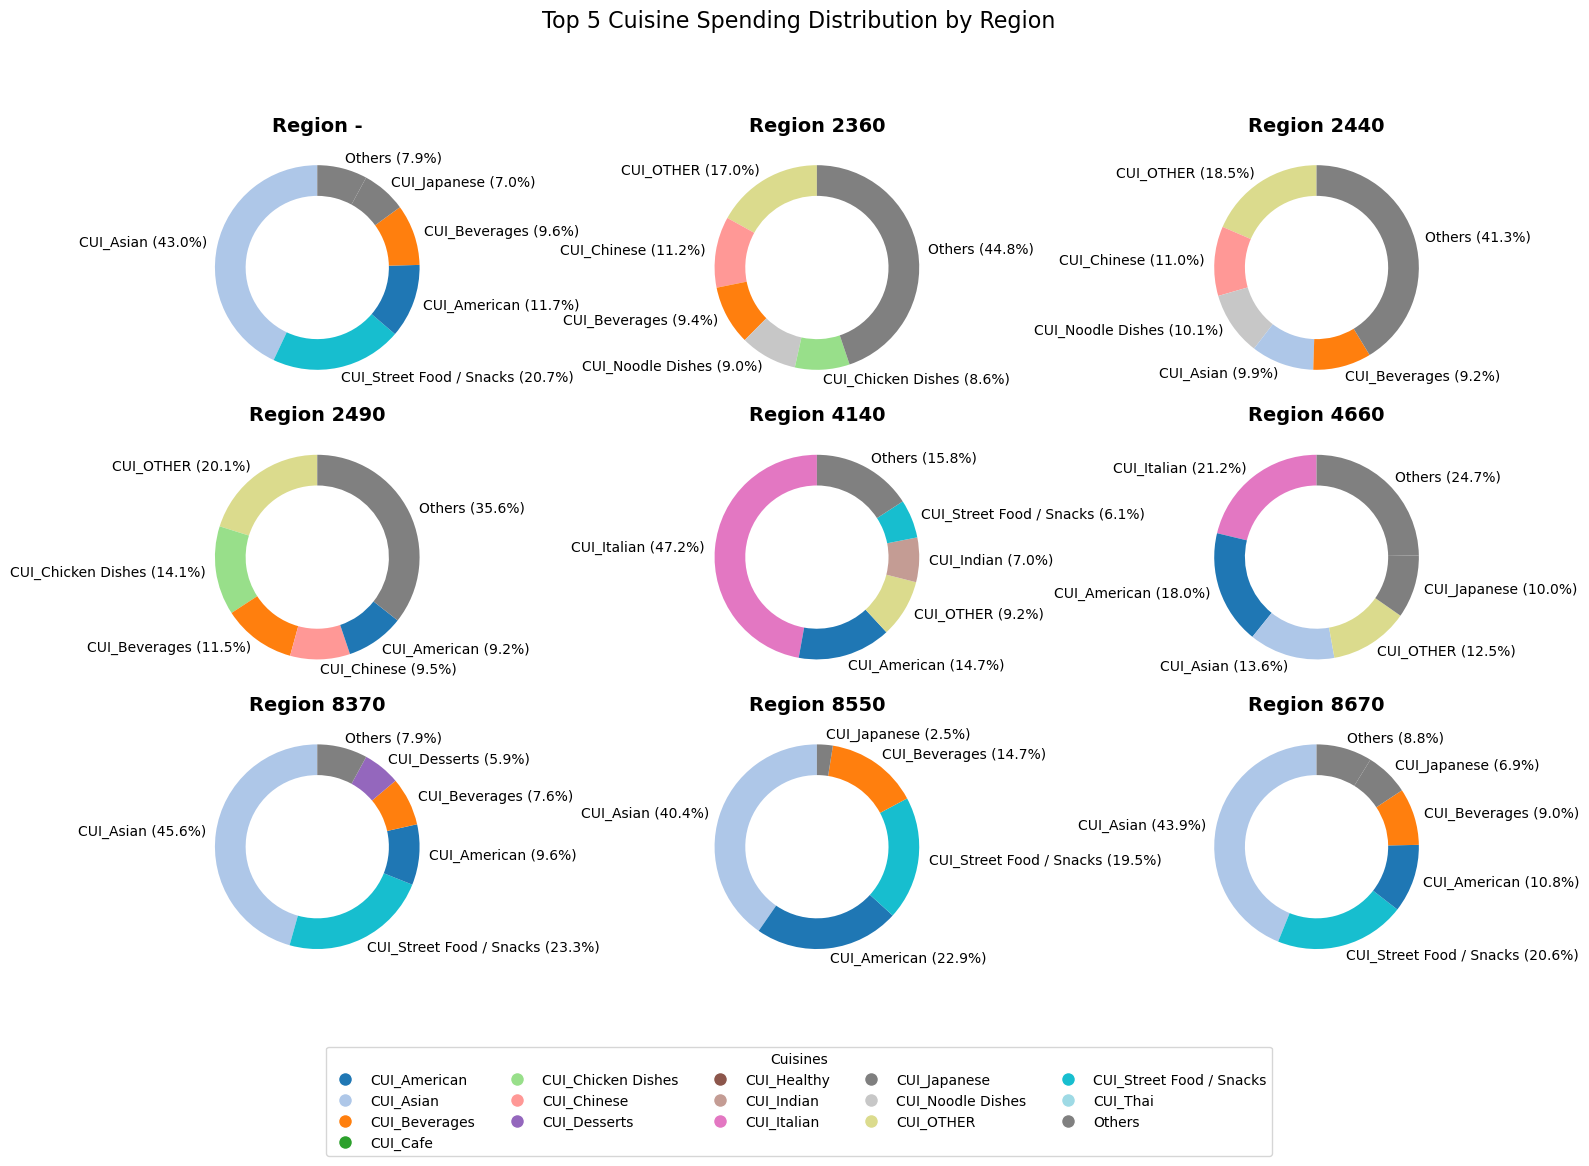

In [76]:
# Step 1: Identify the cuisine-related columns (assuming they are named like 'CUI_American', 'CUI_Asian', etc.)
cuisine_columns = [col for col in df_treat_missing.columns if col.startswith('CUI_')]

# Step 2: Define a consistent color palette for the cuisines
colors = plt.cm.get_cmap('tab20', len(cuisine_columns)).colors
cuisine_color_map = {cuisine: colors[i] for i, cuisine in enumerate(cuisine_columns)}
cuisine_color_map['Others'] = 'gray'  # Color for "Others"

# Step 3: Group by 'customer_region' and sum the spending across cuisines
region_cuisine_spending = df_treat_missing.groupby('customer_region')[cuisine_columns].sum()

# Step 4: Setup the 3x3 grid for pie charts
regions = region_cuisine_spending.index
num_cols = 3
num_rows = 3  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Step 5: Plot a pie chart for each region, only showing top 5 cuisines and aggregating the rest
for i, region in enumerate(regions):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Sort the cuisines by spending and get the top 5
    region_data = region_cuisine_spending.loc[region].sort_values(ascending=False)
    top_5_cuisines = region_data.head(5)
    other_cuisines = region_data[5:].sum()

    # Combine top 5 with "Others" if necessary
    if other_cuisines > 0:
        top_5_cuisines['Others'] = other_cuisines

    # Prepare labels with percentages outside of the pie chart
    labels = [f'{cuisine} ({value:.1f}%)' for cuisine, value in zip(top_5_cuisines.index, (top_5_cuisines / top_5_cuisines.sum()) * 100)]
    
    # Pie chart for the current region with consistent colors
    ax.pie(top_5_cuisines, labels=labels, startangle=90, colors=[cuisine_color_map[cuisine] for cuisine in top_5_cuisines.index], wedgeprops=dict(width=0.3))
    ax.set_title(f'Region {region}', fontsize=14, fontweight='bold')

# If there are empty subplots, hide them
for i in range(9, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Step 6: Create a legend with cuisine color mapping
fig.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cuisine_color_map[cuisine], markersize=10) for cuisine in cuisine_color_map],
           labels=list(cuisine_color_map.keys()), loc='upper center', title='Cuisines', ncol=5, bbox_to_anchor=(0.5, -0.05))

# Step 7: Customize and display the plot
plt.tight_layout()
plt.suptitle('Top 5 Cuisine Spending Distribution by Region', fontsize=16)
plt.subplots_adjust(top=0.85)  # Adjust title positioning and layout for the legend
plt.show()

Strong correlation here between the emtpy Region (top left) and the region 8670 (bottom right)

<Axes: xlabel='customer_region'>

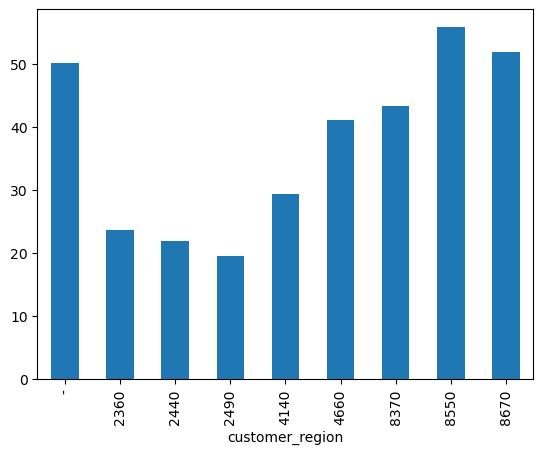

In [77]:
# Identify the cuisine-related columns
cuisine_columns = [col for col in df_treat_missing.columns if col.startswith('CUI_')]

# Group by 'customer_region' and sum the spending across all cuisines
total_spending_by_region = df_treat_missing.groupby('customer_region')[cuisine_columns].sum().sum(axis=1)

#now divide the spending by the number of customers in each region
total_customers_by_region = df_treat_missing['customer_region'].value_counts()
spending_per_customer = total_spending_by_region / total_customers_by_region

#plot the results
spending_per_customer.plot(kind='bar')

Also for average spending per customer the two null region is the most similar to 8670

Now compare the two regions directly with each other (including another possible region)

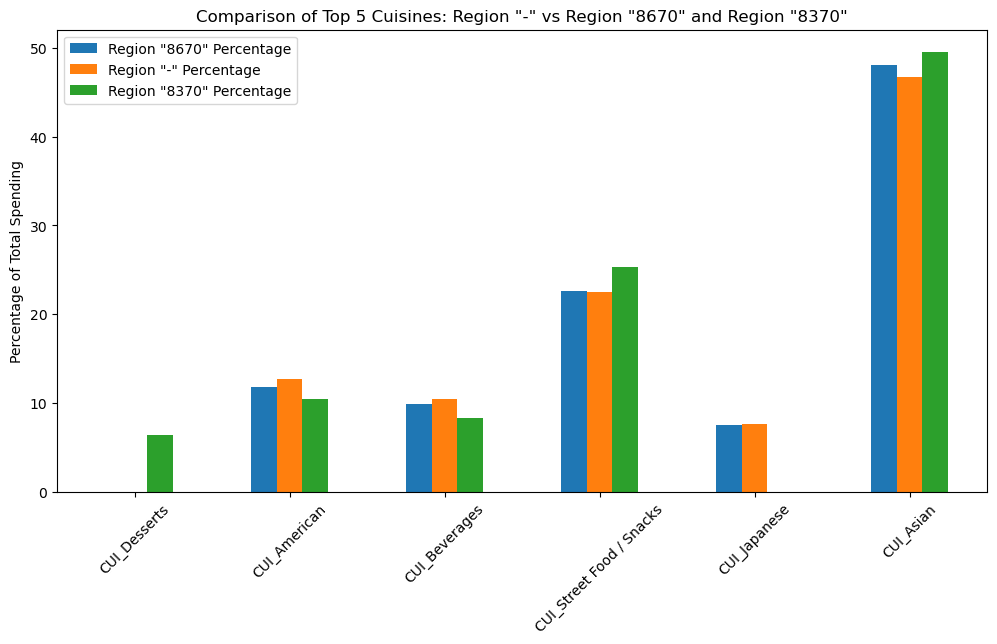

,Cuisine,"Difference with Region ""8670"" (%)","Difference with Region ""8370"" (%)"
0,CUI_Desserts,0.000000,6.416815
1,CUI_American,0.843978,2.297839
2,CUI_Beverages,0.587123,2.170110
3,CUI_Street Food / Snacks,0.086257,2.811037
4,CUI_Japanese,0.090852,7.646277
5,CUI_Asian,1.435696,2.886375


In [78]:
# Step 1: Get spending data for the regions
region_dash_spending = region_cuisine_spending.loc['-']
region_8370_spending = region_cuisine_spending.loc['8370']
region_8670_spending = region_cuisine_spending.loc['8670']

# Step 2: Sort the new region and get the top 5 cuisines
top_5_cuisines_dash = region_dash_spending.sort_values(ascending=False).head(5)
top_5_cuisines_8370 = region_8370_spending.sort_values(ascending=False).head(5)
top_5_cuisines_8670 = region_8670_spending.sort_values(ascending=False).head(5)

# Step 3: Calculate the percentages of spending for region "8370"
top_5_cuisines_dash_percentage = (top_5_cuisines_dash / top_5_cuisines_dash.sum()) * 100
top_5_cuisines_8370_percentage = (top_5_cuisines_8370 / top_5_cuisines_8370.sum()) * 100
top_5_cuisines_8670_percentage = (top_5_cuisines_8670 / top_5_cuisines_8670.sum()) * 100

# Step 4: Combine all the top cuisines to find the common ones
all_cuisines = set(top_5_cuisines_dash_percentage.index) | set(top_5_cuisines_8670_percentage.index) | set(top_5_cuisines_8370_percentage.index)

# Step 5: Recalculate percentages including any missing cuisines (fill missing with 0)
top_5_cuisines_dash_percentage = top_5_cuisines_dash_percentage.reindex(all_cuisines, fill_value=0)
top_5_cuisines_8670_percentage = top_5_cuisines_8670_percentage.reindex(all_cuisines, fill_value=0)
top_5_cuisines_8370_percentage = top_5_cuisines_8370_percentage.reindex(all_cuisines, fill_value=0)

# Step 6: Create a DataFrame to compare all three regions
comparison_df = pd.DataFrame({
    'Region "8670" Percentage': top_5_cuisines_8670_percentage,
    'Region "-" Percentage': top_5_cuisines_dash_percentage,
    'Region "8370" Percentage': top_5_cuisines_8370_percentage
})

# Step 7: Plot the comparison for visualization
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Top 5 Cuisines: Region "-" vs Region "8670" and Region "8370"')
plt.ylabel('Percentage of Total Spending')
plt.xticks(rotation=45)
plt.show()

# Step 8: Calculate the percentage differences between Region "-" and the other two regions
percentage_difference_8670 = (top_5_cuisines_dash_percentage - top_5_cuisines_8670_percentage).abs()
percentage_difference_8370 = (top_5_cuisines_dash_percentage - top_5_cuisines_8370_percentage).abs()

# Step 9: Create a DataFrame to show the differences
difference_df = pd.DataFrame({
    'Cuisine': percentage_difference_8670.index,
    'Difference with Region "8670" (%)': percentage_difference_8670.values,
    'Difference with Region "8370" (%)': percentage_difference_8370.values
})

difference_df

The numbers indicate the customers of the empty region are in close geographical proximity to 8670. Therefore will we change the region for all customers of "-" to 8670.

In [79]:
df_treat_missing['customer_region'].replace('-', '8670', inplace=True)

Customer_age

In [80]:
# Filter the data to include only rows where customer_age is NaN
nan_age_df = df_treat_missing[df_treat_missing['customer_age'].isna()]

# Create a dictionary to store the most common value and its percentage for each feature
common_values = {}

# For each column in the filtered DataFrame, calculate the most common value and its percentage
for column in nan_age_df.columns:
    if nan_age_df[column].notna().sum() > 0:  # Check if there are non-NaN values in the column
        most_common_value = nan_age_df[column].mode()[0]  # Get the most frequent value
        percentage = (nan_age_df[column].value_counts(normalize=True).iloc[0]) * 100  # Calculate its percentage
        common_values[column] = [most_common_value, percentage]
    else:
        # If the column only contains NaN values, mark it as such
        common_values[column] = ['NaN only', 0]

# Convert the dictionary to a DataFrame for easy visualization
common_values_df = pd.DataFrame(common_values, index=['Most Common Value', 'Percentage (%)']).T

# Display the resulting DataFrame
print(common_values_df)



                         Most Common Value Percentage (%)
customer_region                       2360      30.261348
customer_age                      NaN only              0
vendor_count                           1.0       26.96011
product_count                          2.0      19.669876
is_chain                               1.0      23.933975
first_order                            0.0       6.482759
last_order                            89.0       6.602476
last_promo                         NOPROMO      56.671252
payment_method                        CARD      63.686382
CUI_American                           0.0      64.924347
CUI_Asian                              0.0      62.310867
CUI_Beverages                          0.0      83.768913
CUI_Cafe                               0.0      94.360385
CUI_Chicken Dishes                     0.0      90.646492
CUI_Chinese                            0.0      88.583219
CUI_Desserts                           0.0      91.746905
CUI_Healthy   

No feature is really outstanding here

In [81]:
# Define bins and labels for the generation categories
bins = [14, 25, 41, 57, 76, 81]  # Age ranges
labels = ["Gen_Z", "Millennials", "Gen_X", "Baby_Boomers", "Silent_Generation"]

# Step 1: Create a new column for generation based on customer_age, ignoring NaNs for now
df_treat_missing["generation"] = pd.cut(df_treat_missing["customer_age"], bins=bins, labels=labels)

# Step 2: Convert the generation column to a categorical type and add 'Unknown' as a category
df_treat_missing["generation"] = df_treat_missing["generation"].astype('category')
df_treat_missing["generation"] = df_treat_missing["generation"].cat.add_categories('Unknown')

# Step 3: Fill NaN values in the 'generation' column with 'Unknown'
df_treat_missing["generation"].fillna('Unknown', inplace=True)

# Step 4: Check the value counts for the generation column (including 'Unknown')
df_treat_missing["generation"].value_counts(dropna=False)

generation
Millennials          14923
Gen_Z                14664
Gen_X                 1391
Unknown                727
Baby_Boomers           111
Silent_Generation       12
Name: count, dtype: int64

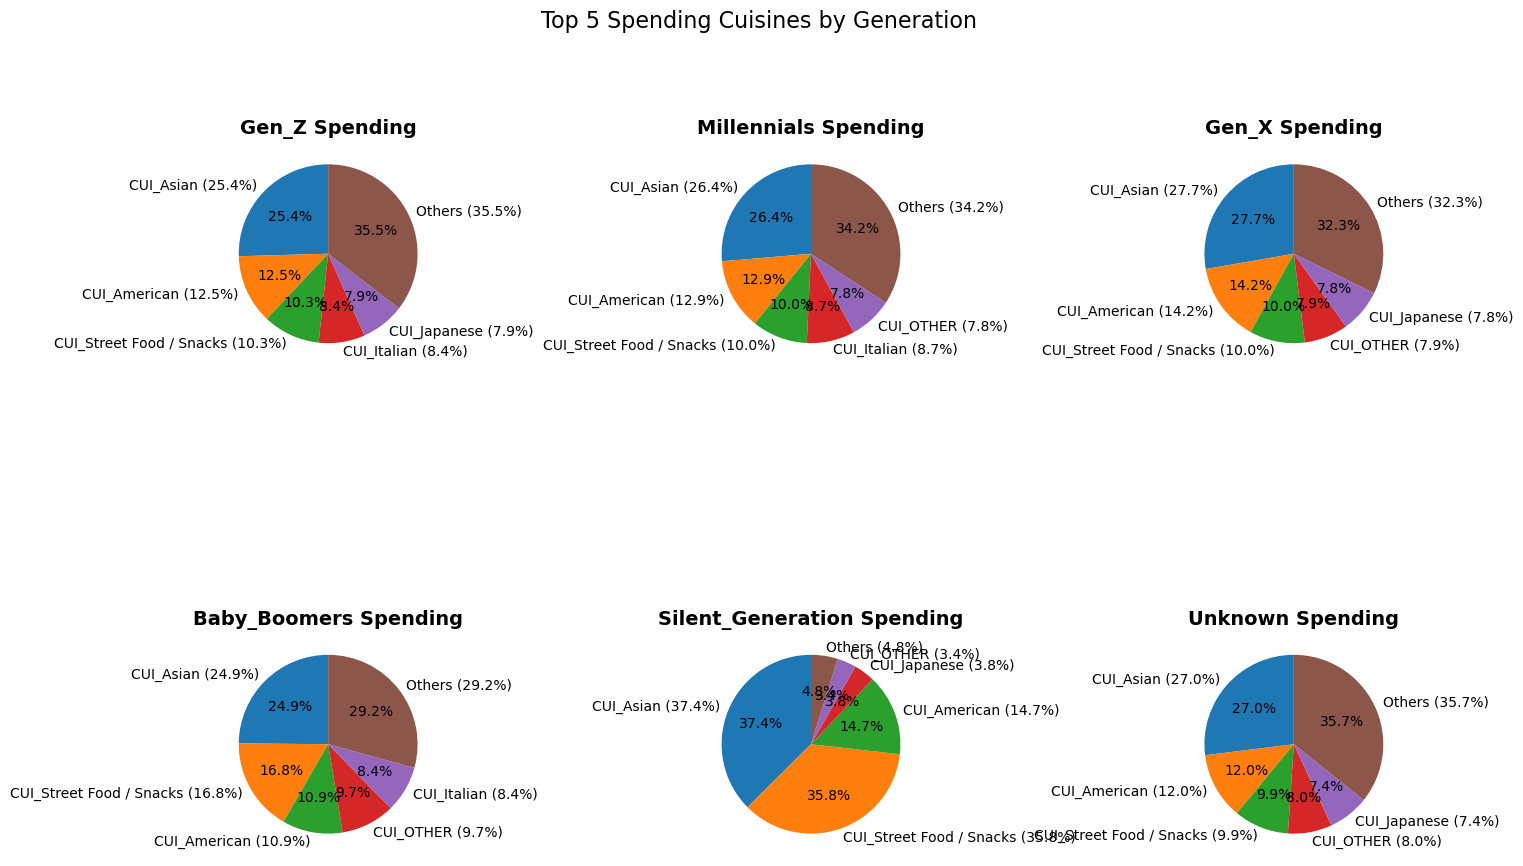

In [82]:


# Step 1: Add a category for NaN values in the 'generation' column
df_treat_missing['generation'] = pd.cut(df_treat_missing['customer_age'], bins=bins, labels=labels)
df_treat_missing['generation'] = df_treat_missing['generation'].cat.add_categories('Unknown')
df_treat_missing['generation'].fillna('Unknown', inplace=True)

# Step 2: Identify the cuisine-related columns (assuming they are named like 'CUI_American', 'CUI_Asian', etc.)
cuisine_columns = [col for col in df_treat_missing.columns if col.startswith('CUI_')]

# Step 3: Group by 'generation' and sum the spending across cuisines
generation_cuisine_spending = df_treat_missing.groupby('generation')[cuisine_columns].sum()

# Step 4: Plot top 5 spending cuisines for each generation
generations = generation_cuisine_spending.index
num_generations = len(generations)

# Create a 2x3 grid for the pie charts (to accommodate the different generations)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, generation in enumerate(generations):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    # Sort the cuisines by spending and get the top 5
    generation_data = generation_cuisine_spending.loc[generation].sort_values(ascending=False)
    top_5_cuisines = generation_data.head(5)
    other_cuisines = generation_data[5:].sum()

    # Combine top 5 with "Others" if necessary
    if other_cuisines > 0:
        top_5_cuisines['Others'] = other_cuisines

    # Prepare labels with percentages for the top 5 cuisines
    labels = [f'{cuisine} ({value:.1f}%)' for cuisine, value in zip(top_5_cuisines.index, (top_5_cuisines / top_5_cuisines.sum()) * 100)]

    # Pie chart for the current generation
    ax.pie(top_5_cuisines, labels=labels, startangle=90, autopct='%1.1f%%')
    ax.set_title(f'{generation} Spending', fontsize=14, fontweight='bold')

# Remove empty subplots (if fewer than 6 generations)
for i in range(num_generations, 6):
    fig.delaxes(axes.flatten()[i])

# Step 5: Customize and display the plot
plt.tight_layout()
plt.suptitle('Top 5 Spending Cuisines by Generation', fontsize=16)
plt.show()


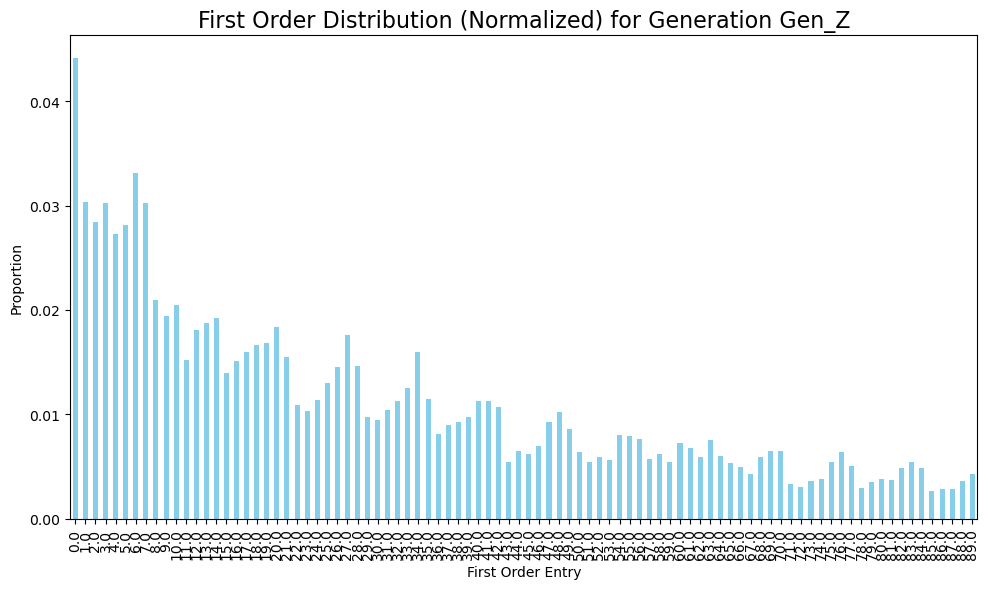

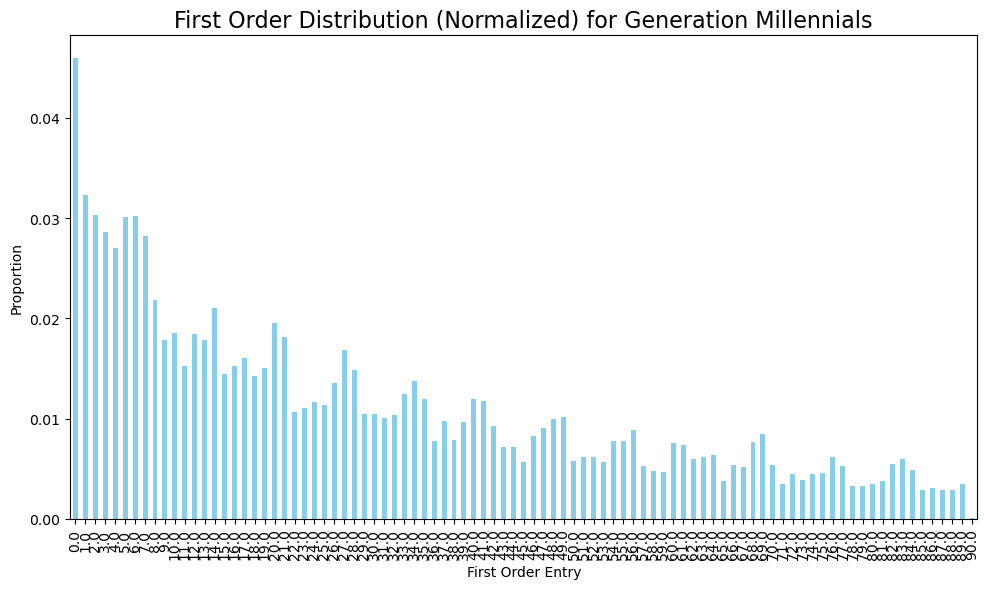

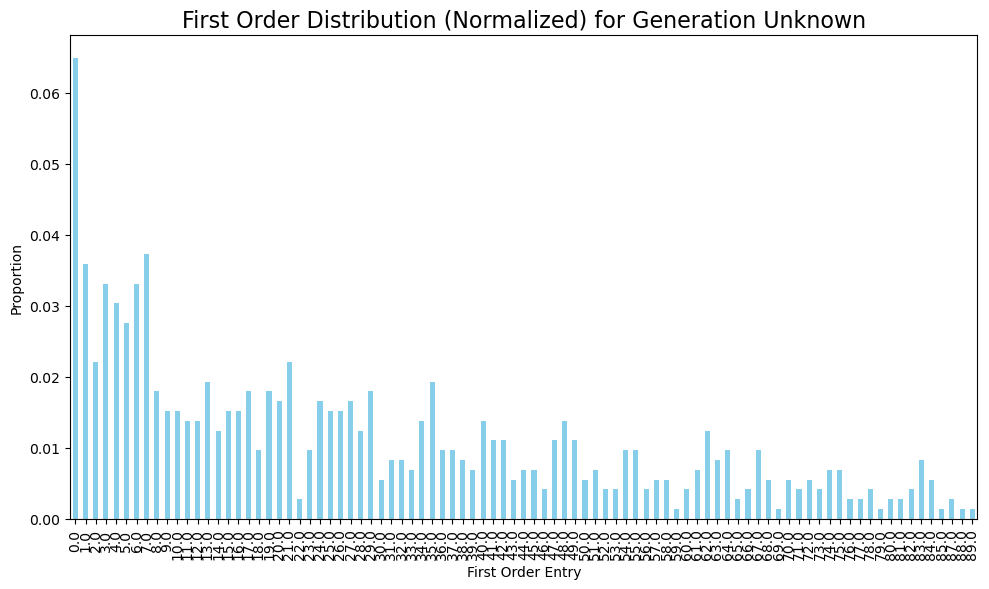

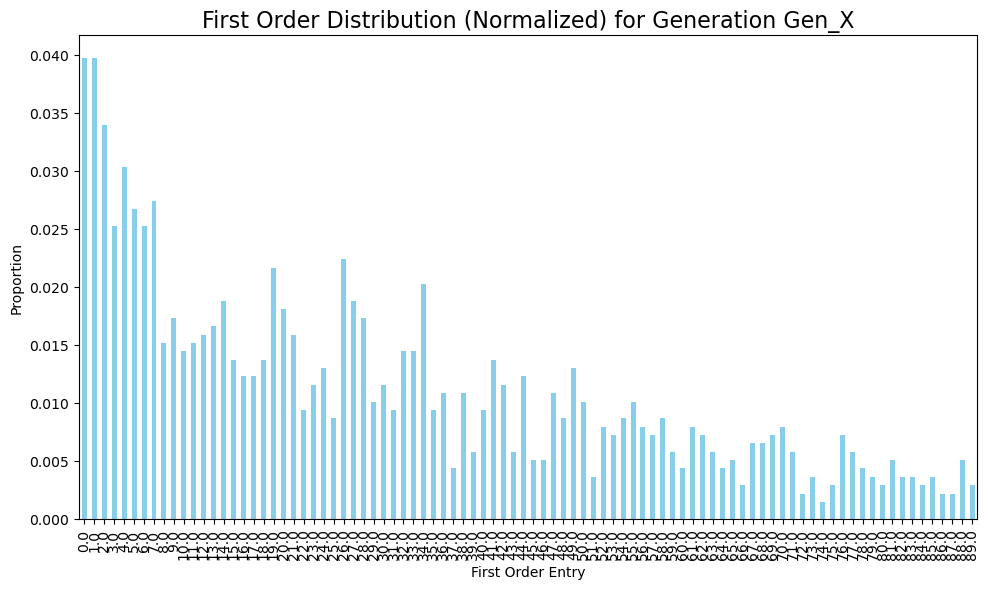

In [83]:
# Get the unique generations including 'Unknown' for NaN values, excluding 'Baby_Boomers' and 'Silent_Generation'
generations = df_treat_missing['generation'].unique()
generations = [gen for gen in generations if gen not in ['Baby_Boomers', 'Silent_Generation']]  # Exclude unwanted generations

# Create a bar chart for each generation separately, including the 'Unknown' group
for generation in generations:
    plt.figure(figsize=(10, 6))

    # Filter data for the current generation, including 'Unknown'
    generation_data = df_treat_missing[df_treat_missing['generation'] == generation]

    # Check if there is data to plot
    if not generation_data['first_order'].isna().all():  # Ensure there is data
        # Get the value counts of 'first_order' and normalize them by dividing by the total count for that generation
        normalized_counts = generation_data['first_order'].value_counts(normalize=True).sort_index()

        # Plot the normalized frequency distribution of 'first_order' for the current generation
        normalized_counts.plot(kind='bar', color='skyblue')

        # Add titles and labels
        title = f'First Order Distribution (Normalized) for Generation {generation}' if pd.notna(generation) else 'First Order Distribution (Normalized) for Unknown'
        plt.title(title, fontsize=16)
        plt.xlabel('First Order Entry')
        plt.ylabel('Proportion')

        # Show the bar chart for each generation
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to plot for Generation {generation}")


In [84]:
# Filter the data to include only rows where customer_age is NaN
nan_age_df = df_treat_missing[df_treat_missing['customer_age'].isna()]

# Create a dictionary to store the most common value and its percentage for each feature
common_values = {}

# For each column in the filtered DataFrame, calculate the most common value and its percentage
for column in nan_age_df.columns:
    if nan_age_df[column].notna().sum() > 0:  # Check if there are non-NaN values in the column
        most_common_value = nan_age_df[column].mode()[0]  # Get the most frequent value
        percentage = (nan_age_df[column].value_counts(normalize=True).iloc[0]) * 100  # Calculate its percentage
        common_values[column] = [most_common_value, percentage]
    else:
        # If the column only contains NaN values, mark it as such
        common_values[column] = ['NaN only', 0]

# Convert the dictionary to a DataFrame for easy visualization
common_values_df = pd.DataFrame(common_values, index=['Most Common Value', 'Percentage (%)']).T

# Display the resulting DataFrame
print(common_values_df)



                         Most Common Value Percentage (%)
customer_region                       2360      30.261348
customer_age                      NaN only              0
vendor_count                           1.0       26.96011
product_count                          2.0      19.669876
is_chain                               1.0      23.933975
first_order                            0.0       6.482759
last_order                            89.0       6.602476
last_promo                         NOPROMO      56.671252
payment_method                        CARD      63.686382
CUI_American                           0.0      64.924347
CUI_Asian                              0.0      62.310867
CUI_Beverages                          0.0      83.768913
CUI_Cafe                               0.0      94.360385
CUI_Chicken Dishes                     0.0      90.646492
CUI_Chinese                            0.0      88.583219
CUI_Desserts                           0.0      91.746905
CUI_Healthy   

No imputations can be created out of the data exploration. As the null values are only 2.28 I recommend dropping the customers with null values for the age. Nonetheless, will I impute the missing values for the data visualization with kNN.

In [103]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Step 2: Identify numerical and categorical columns in other features
numerical_cols = df_treat_missing.select_dtypes(include=['number']).columns
categorical_cols = df_treat_missing.select_dtypes(exclude=['number']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Step 3: Apply ordinal encoding to the categorical columns without changing their names
encoded_categorical = pd.DataFrame(encoder.fit_transform(df_treat_missing[categorical_cols]), 
                                   index=df_treat_missing.index, 
                                   columns=categorical_cols)
encoder = OrdinalEncoder()
encoded_categorical = pd.DataFrame(encoder.fit_transform(df_treat_missing[categorical_cols]), index=df_treat_missing.index)



# Step 4: Combine numerical and encoded categorical data (excluding customer_age)
numerical_data = df_treat_missing[numerical_cols]
combined_data = pd.concat([numerical_data, encoded_categorical], axis=1)

# Step 5: Add the customer_age column back (with missing values)
combined_data['customer_age'] = df_treat_missing['customer_age']
# Ensure all column names are strings
combined_data.columns = combined_data.columns.astype(str)


# Step 6: Impute missing values in customer_age using kNN
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(combined_data)

# Step 7: Convert imputed data back into a DataFrame and update customer_age
imputed_df = pd.DataFrame(imputed_data, columns=combined_data.columns)
imputed_df.head(5).T
#df_treat_missing['customer_age'] = imputed_df['customer_age']

# Step 8: Check if there are any remaining missing values in customer_age
#print(df_treat_missing['customer_age'].isna().sum())  # Should print 0 if all missing values are filled

Numerical columns: Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2',
       'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4',
       'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12',
       'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20',
       'HR_21', 'HR_22', 'HR_23'],
      dtype='object')
Categorical columns: Index(['customer_region', 'last_promo', 'payment_method', 'generation'], dtype='object')


,0,1,2,3,4
customer_age,18.00,17.00,38.0,23.80,20.00
vendor_count,2.00,2.00,1.0,2.00,2.00
product_count,5.00,2.00,2.0,3.00,5.00
is_chain,1.00,2.00,2.0,1.00,0.00
first_order,0.00,0.00,0.0,0.00,0.00
last_order,1.00,1.00,1.0,2.00,2.00
CUI_American,0.00,12.82,9.2,0.00,14.57
CUI_Asian,0.00,6.39,0.0,13.70,40.87
CUI_Beverages,0.00,0.00,0.0,0.00,0.00
CUI_Cafe,0.00,0.00,0.0,0.00,0.00


First_order

In [ ]:
df_null_first_order = df_treat_missing[df_treat_missing['first_order'].isnull()]
print(f'Amount of null values for first_order: {df_null_first_order.shape[0]}\nCustomers who only ordered from 1 vendor: {df_null_first_order[(df_null_first_order['vendor_count']  ==1)].shape[0]}\nCustomers that have a last_order value of 0: {df_null_first_order[(df_null_first_order['last_order']  == 0)].shape[0]}')

In [ ]:
df_treat_missing[(df_treat_missing['first_order'] == 0) & (df_treat_missing['last_order'] == 0)].shape[0]

Imputation: The customers with a null value did there first order and last order on the same day the dataset got created

In [44]:
df_treat_missing['first_order'].fillna(0, inplace=True)

> ## 4.4. Data Types <a class="anchor" id="data_types"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [ ]:
df_adjust_dtypes = df_treat_missing.copy()
df_adjust_dtypes.dtypes

- age: should be a integer
- first order: is number of days so should be a integer

In [28]:
# Using "Int64" allows for the representation of NaN values alongside integers
# df_adjust_dtypes["customer_age"] = df_adjust_dtypes["customer_age"].astype("Int64")
# df_adjust_dtypes["first_order"] = df_adjust_dtypes["first_order"].astype("Int64")

In [ ]:
df_adjust_dtypes.dtypes[["customer_age", "first_order"]]

> ## 4.5. Coherence Checking <a class="anchor" id="coherence_checking"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

> ### 4.5.1. Minors Customers <a class="anchor" id="sub_section_4_5_1"></a>

In [30]:
df_inconsistencies = df_adjust_dtypes.copy()

Verify if there are minor customers (should not exist, because they are not allowed to placed orders online)

In [ ]:
# Check the age distribution
df_inconsistencies["customer_age"].describe()

In [ ]:
# Count customers under 18
minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers under 18 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

minor_customers.describe().round(2).T

In [ ]:
minor_customers.describe(include="object")

Given that only 1.14% of your customers are minors we can decide to remove these customers. Removing these customers can lead to more accurate analysis and insights relevant to the target demographic

In [ ]:
# Remove customers under 18 from the dataset
df_inconsistencies = df_inconsistencies[df_inconsistencies["customer_age"] >= 18]

# Verify the removal
remaining_minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
print(f"Remaining customers under 18 years old: {len(remaining_minor_customers)}")

> ### 4.5.2. Is_chain variable <a class="anchor" id="sub_section_4_5_2"></a>
Explore "is_chain" variable

In [ ]:
df_inconsistencies["is_chain"].describe()

From the metadata, "is_chain" - "Indicates whether the customer’s order was from a chain restaurant.". From this statistics, sure the metadata is wrong. However, as we cannot guess any possible meaning for this variable, we decide to delete it

In [36]:
df_inconsistencies.drop("is_chain", axis=1, inplace=True)

> ### 4.5.3. CUI_Asian vs Japonese, Chinese <a class="anchor" id="sub_section_4_5_3"></a>

Check if CUI_Asian is equal to the sum of the specific cuisine types (chinese, japonese, etc)

In [ ]:
# Select all columns that start with "CUI_"
df_inconsistencies.filter(like="CUI_").columns

In [ ]:
# Define broader categories and their specific subcategories
asian_cuisines = ['CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Create the sum of specific Asian cuisines
sum_asian_cuisines = df_inconsistencies[asian_cuisines].sum(axis=1)

# Compare CUI_Asian with the sum of specific Asian cuisines
asian_cuisine_inconsistencies = df_inconsistencies[df_inconsistencies['CUI_Asian'] != sum_asian_cuisines]

# Check how many rows are inconsistent
num_inconsistent_rows = len(asian_cuisine_inconsistencies)
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

print(f"Number of inconsistent rows: {num_inconsistent_rows} ({round(perc_inconsistent_rows, 2)}%)")

This inconsistency should be further explored. It might be due to classification of restaurants in the app (for example, some restaurants are considered CUI_Asian and CUI_Japonese, while others are just considered CUI_Asian)

In [ ]:
# Calculate the differences between "last_order" and "first_order"
diffs = (df_inconsistencies['CUI_Asian'] - sum_asian_cuisines).abs()

# Display how many rows have certain differences
print("\nCounts of differences between CUI_Asian and sum of specific Asian cuisines:")
diffs.value_counts().sort_index()

> ### 4.5.4. Last_order and First_order consistency <a class="anchor" id="sub_section_4_5_4"></a>

Verify that last_order is lower than or equal to first_order for each customer

In [ ]:
# Drop rows with missing values in "first_order" ("last_order" has no missing values)
data_cleaned = df_inconsistencies.dropna(subset="first_order")

# Check when "last_order" is greater than "first_order"
is_last_order_greater = data_cleaned["last_order"] > data_cleaned["first_order"]

# Calculate the percentage of inconsistent rows based on the original dataframe
perc_inconsistencies = is_last_order_greater.sum() / len(df_inconsistencies) * 100

# Output the percentage of rows where "last_order" is greater than "first_order"
print(f"Inconsistent rows: {perc_inconsistencies.round(2)}%")

# Calculate the differences between "last_order" and "first_order"
diffs = data_cleaned["last_order"] - data_cleaned["first_order"]

# Display how many rows have certain differences
print("\nCounts of differences between last_order and first_order:")
diffs.value_counts().sort_index()

Possible approach: Since 77.11% of the entries have last_order greater than first_order, this suggests a serious issue with these columns. If the inconsistencies cannot be resolved, it may be better to remove them

Let"s analyze the inconsistencies

In [ ]:
# Rows where the sums are inconsistent
inconsistencies = df_inconsistencies["last_order"] > df_inconsistencies["first_order"]

# Get summary statistics of the inconsistent rows
df_inconsistencies[inconsistencies].describe().T

In [ ]:
df_inconsistencies[inconsistencies].describe(include="object")

> ### 4.5.5. Sum DOWs vs sum HRs <a class="anchor" id="sub_section_4_5_5"></a>

Check that the sum of orders by day (DOW_0 to DOW_6) matches the total number of orders from hourly data (HR_1 to HR_23)

In [ ]:
# Sum of DOW columns (DOW_0 to DOW_6)
dow_columns = [f"DOW_{i}" for i in range(7)]
dow_sum = df_inconsistencies[dow_columns].sum(axis=1)

# Sum of HR columns (HR_0 to HR_23, including HR_0)
hr_columns = [f"HR_{i}" for i in range(1, 24)]
hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Check if the sums are equal
sums_equal = dow_sum != hr_sum

# Output the percentage of rows where DOW sum and HR sum are different
perc_inconsistent = sums_equal.sum() / len(df_inconsistencies) * 100
print(f"Inconsistent rows: {perc_inconsistent.round(2)}%")

# Calculate and display the absolute differences
sums_diff = (dow_sum - hr_sum).abs()

# Display how many rows have certain differences
print("\nCounts of differences between dow_sum and hr_sum:")
sums_diff.value_counts().sort_index()

Possible approach:
- small inconsistencies (e.g., 1-2 orders): Adjust values (also because they represent the highest amount of inconsistencies).
- large inconsistencies: Investigate patterns, and remove if they appear random (also because they represent a very small part of the dataset).

Let"s analyze the small inconsistencies

In [ ]:
# Rows where the sums are inconsistent
df_small_inconsistencies = df_inconsistencies[sums_diff <= 2]

# Get summary statistics of the inconsistent rows
df_small_inconsistencies.describe().T

In [ ]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_small_inconsistencies.describe(include="object")

Let's treat the inconsistencies in DOW and HR

Small inconsistencies (the "problem" is that we'll be converting DOW columns to floating numbers, due to the adjustment factor). Therefore, for now let's just remove these inconsistencies

In [46]:
# Identify small inconsistencies (1 or 2 orders)
# small_inconsistencies_mask = (sums_diff == 1) | (sums_diff == 2)

# Identify large inconsistencies (> 2 orders)
# large_inconsistencies_mask = sums_diff > 2

# Adjust the smaller sum (either DOW or HR) to match the larger one for small inconsistencies

# Create a mask for rows with small inconsistencies
# small_dow_sum = dow_sum[small_inconsistencies_mask]
# small_hr_sum = hr_sum[small_inconsistencies_mask]

# Calculate the adjustment factor for small inconsistencies
# adjustment_factors = small_hr_sum / small_dow_sum

# We broadcast the adjustment factors to the corresponding rows in dow_columns
# df_inconsistencies.loc[small_inconsistencies_mask, dow_columns] *= adjustment_factors.values[:, np.newaxis]

# Recalculate sums after adjustments to verify the changes
# adjusted_dow_sum = df_inconsistencies[dow_columns].sum(axis=1)
# adjusted_hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Update the difference calculation after adjustments
# adjusted_sums_diff = (adjusted_dow_sum - adjusted_hr_sum).abs()

# Check if small inconsistencies have been successfully treated
# small_inconsistencies_treated_count = ((adjusted_sums_diff == 1) | (adjusted_sums_diff == 2)).sum()

# Print the count of small inconsistencies after treatment
# print(f"Count of small inconsistencies after treatment: {small_inconsistencies_treated_count}")

In [ ]:
# Identify the rows with inconsistencies
inconsistencies_mask = sums_diff > 0

# Remove inconsistent rows from the DataFrame
df_inconsistencies = df_inconsistencies[~inconsistencies_mask].copy()

# Recalculate the sums for DOW and HR columns after removal
cleaned_dow_sum = df_inconsistencies[dow_columns].sum(axis=1)
cleaned_hr_sum_cleaned = df_inconsistencies[hr_columns].sum(axis=1)

# Calculate the differences again
sums_diff_cleaned = (cleaned_dow_sum - cleaned_hr_sum_cleaned).abs()

# Check if there are any remaining inconsistencies
remaining_inconsistencies_count = (sums_diff_cleaned > 2).sum()

# Print results to verify
print(f"Number of remaining inconsistencies after cleaning: {remaining_inconsistencies_count}")

> ### 4.5.6. Total Orders and Vendor Count consistency <a class="anchor" id="sub_section_4_5_6"></a>

Total Orders Consistency: The total number of orders placed (the sum of the DOW/HR columns) should not exceed the total number of products ordered (product_count).<br>

Vendor Count Consistency: The vendor_count should not exceed the number of unique products ordered, since each product should come from a vendor. This ensures that the recorded count of unique vendors matches the reality of product purchases.

In [ ]:
# Calculate total orders based on DOW columns
total_orders = df_inconsistencies[dow_columns].sum(axis=1)

# Check if total orders are less than product count
inconsistent_orders = total_orders > df_inconsistencies['product_count']

# Check if vendor count exceeds product count
inconsistent_vendors = df_inconsistencies['vendor_count'] > df_inconsistencies['product_count']

# Combine both conditions to find all inconsistencies
inconsistencies_mask = inconsistent_orders | inconsistent_vendors

# Count the number of inconsistent rows
num_inconsistent_rows = inconsistencies_mask.sum()

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {num_inconsistent_rows} ({perc_inconsistent_rows.round(2)}%)")

Check if the rows with inconsistencies in orders and vendors are the same

In [ ]:
# Check if the indices of both inconsistency sets are the same
inconsistent_rows_same = inconsistent_orders.index.equals(inconsistent_vendors.index)

# Step 2: Output the result
if inconsistent_rows_same:
    print("The rows with inconsistencies in orders and vendors are the same.")
else:
    print("There are differences in the rows with inconsistencies between orders and vendors.")

In [ ]:
df_inconsistencies[inconsistencies_mask].head().T

In [51]:
# Remove rows with inconsistencies in total orders or vendor count
df_inconsistencies = df_inconsistencies[~inconsistencies_mask]

> ### 4.5.7. Total rows with inconsistencies <a class="anchor" id="sub_section_4_5_7"></a>
Final Step: Calculate the Percentage of Rows Removed Due to Inconsistencies

In [ ]:
# Calculate the number of rows removed
rows_removed = len(df_adjust_dtypes) - len(df_inconsistencies)

# Calculate the percentage of rows removed
percentage_removed = rows_removed / len(df_adjust_dtypes) * 100

# Output the result
print(f"Rows removed due to inconsistencies: {rows_removed} ({round(percentage_removed, 2)}%)")

> ## 4.6. Visualizations <a class="anchor" id="visualizations"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [53]:
df_visualizations = df_inconsistencies.copy()

In [ ]:
df_visualizations.columns

In [ ]:
# Define metric and non-metric features
metric_features = df_visualizations.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_visualizations.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR columns from metric features
metric_features_excluding_dow = [feat for feat in metric_features if feat not in dow_columns]
metric_features_excluding_hr = [feat for feat in metric_features if feat not in hr_columns]

# Exclude both DOW and HR columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]

# Output the results
print(f"Non-metric features: {non_metric_features}")
print(f"Metric features (excluding DOW): {metric_features_excluding_dow}")
print(f"Metric features (excluding HR): {metric_features_excluding_hr}")
print(f"Metric features (excluding DOW and HR): {metric_features_excluding_dow_and_hr}")

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df_visualizations[feat])
    ax.set_title(feat, fontsize=10)  # Title with a clean size

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)

# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

sns.set() ## Reset to darkgrid 

In [ ]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_theme(style='white')

# Calculate the number of rows and columns for a square matrix layout
total_features = len(metric_features)
sp_cols = math.ceil(math.sqrt(total_features))  # Columns based on the square root of total features
sp_rows = math.ceil(total_features / sp_cols)   # Rows to accommodate all features

# Prepare figure. Create individual axes where each boxplot will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each boxplot. Hint: don't forget to attach the boxplot to the current ax
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_visualizations[feat], ax=ax)
    ax.set_title(feat, fontsize=10)  # Set title
    ax.xaxis.set_label_position('top')  # Move the label to the top
    ax.set_xlabel('')  # Remove the default x-axis label at the bottom

# Remove empty subplots if there are more axes than features
for ax in axes.flatten()[len(metric_features):]:
    fig.delaxes(ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

# Save the figure
# plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

plt.show()

# Reset theme to "darkgrid"
sns.set()

In [ ]:
# Pairwise Relationship of Numerical Variables excluding DOW and HR
sns.set()

# Setting pairplot
sns.pairplot(df_visualizations[metric_features_excluding_dow_and_hr], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)
    
# plt.savefig(os.path.join('..', 'figures', 'eda', 'pairwise_numeric_scatterplots_excluding_dow_and_hr.png'), dpi=200)
plt.show()

In [ ]:
# distribution of customer_age
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(df_visualizations['customer_age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

# average and median age
print('The average age :', round(df_visualizations['customer_age'].mean(skipna=True)))
print('The median age :', int(df_visualizations['customer_age'].median()))

In [ ]:
metric_features_excluding_dow_and_hr

In [ ]:
# Set the theme and style for the plot. 'ticks' removes gridlines but keeps ticks on axes
sns.set(style="ticks")

# Create a hexbin jointplot for 'customer_age' and 'CUI_Healthy'
g = sns.jointplot(data=df_visualizations, 
                  x="customer_age",   # X-axis: Customer Healthy
                  y="CUI_Beverages",  # Y-axis: CUI Beverages consumption
                  kind="hex",         # 'hex' creates hexagonal binning for density visualization
                 )

# Add a title to the entire figure, adjusting its vertical position with 'y'
g.fig.suptitle("Hexagon Binning for Age and CUI Healthy", y=1.03)

# Set the axis labels
g.set_axis_labels("Customer Age", "CUI Healthy", fontsize=12)

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

# Display the plot
plt.show()

In [ ]:
# Pair of Metric Variables Scatter Plot

plt.scatter(df_visualizations["customer_age"], df_visualizations["product_count"], 
            edgecolors="black", # Draw the edges of each point
            alpha=.5, # change opacity level of each point
            color='none' # remove the fill color of each point
           )

plt.xlabel("customer_age")
plt.ylabel("product_count")

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

Specify a custom color using the cmap parameter: `cmap=""`<br>
**HINT** see default colormaps from matplotlib here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [ ]:
sns.set(style="white")
fig, ax = plt.subplots()
cat1 = 'customer_age'
cat2 = 'product_count'

hb = ax.hexbin(df_visualizations[cat1], df_visualizations[cat2], 
               gridsize=20,
               cmap='Blues'
              )

ax.set_title("{} and {},\ncorr = {}".format(cat1, cat2, 
                                            np.round(df_visualizations[['customer_age','CUI_Beverages']].corr().values[0,1],4)))
ax.set_xlabel(cat1)
ax.set_ylabel(cat2)

cb = fig.colorbar(hb, ax=ax, label='counts')

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

Improve the previous hexbin (original code already copied below)

Specify a custom color using the cmap parameter: `cmap=""`


**HINT** see default colormaps from matplotlib here: https://matplotlib.org/stable/users/explain/colors/colormaps.html

> ## 4.7. Correlation Matrix <a class="anchor" id="correlation_matrix"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [ ]:
# Prepare figure with a specified size for better clarity
fig = plt.figure(figsize=(12, 8))

# Compute the correlation matrix using the Pearson method for metric features (excluding DOW and HR columns)
corr = df_visualizations[metric_features_excluding_dow_and_hr].corr(method="pearson").round(2)

# Create a mask to annotate only correlations that are very high or very low (above |0.5|)
# Absolute value of the correlation matrix is checked to annotate values >= 0.5 or <= -0.5
mask_annot = np.absolute(corr.values) >= 0.5

# Annotate the heatmap: if the mask condition is True (|value| >= 0.5), display the correlation value; otherwise, leave it blank
annot = np.where(mask_annot, corr.values, "")  # Blank cells for correlations not meeting the threshold

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot,         # Use custom annotations with the mask applied
            fmt='s',             # Format annotations as strings to handle empty cells
            vmin=-1, vmax=1,     # Set the color scale range for correlation (-1 to 1)
            center=0,            # Center the colormap at 0 for balanced visual contrast
            square=True,         # Make each cell a square shape
            linewidths=0.5,      # Add thin lines between cells for better aesthetics
            cmap='PiYG',         # Use a perceptually uniform diverging colormap (Purple to Yellow-Green)
            cbar_kws={'shrink': .75} # Shrink the color bar to avoid overlapping with plot
           )

# Add a title to the heatmap
plt.title("Correlation Matrix of Numeric Features (|corr| >= 0.5)", fontsize=16)

# Save the heatmap as an image in the figures directory
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

# Display the heatmap
plt.show()

> ## 4.8. Outliers <a class="anchor" id="outliers"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [190]:
df = df_visualizations.copy()

In [271]:
from pylab import rcParams
rcParams["figure.figsize"] = 25, 15

In [ ]:
import matplotlib.pyplot as plt

# Plot the histograms for each column
axes = df[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai","last_order","product_count"]].hist(color="cornflowerblue", figsize=(15, 10))

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f"{int(height)}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Since almost every graph shows an outlier, let’s determine if this customer has high spending across all categories or if they differ significantly in specific Cui features

In [ ]:
df_temp= df[df["CUI_Asian"]>600]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

In [ ]:
df_temp= df[df["CUI_American"]>200]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

In [ ]:
df_temp= df[df["CUI_Chinese"]>500]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

As we can see its different customers, so idk if we should remove.

In [ ]:
axes = df[["customer_region", "customer_age", "vendor_count", "weekend_orders", "weekday_orders", "orders_dawn","orders_morning", "orders_afternoon", "orders_evening",
       "Healthiness_Index","is_chain"]].hist( color="cornflowerblue")

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f"{int(height)}", ha="center", va="bottom")

plt.tight_layout()
plt.show()

In [ ]:
df[df["orders_morning"]>50]

In [ ]:
df.columns

In [ ]:
import seaborn as sns

# Function to create a bar plot with counts above each bar
def plot_bar_with_counts(column, title):
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df, x=column, palette="Set3")
    plt.title(title)
    plt.ylabel("Count")
    
    # Add count annotations above each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha="center", va="bottom", fontsize=12, color="black", xytext=(0, 5), 
                    textcoords="offset points")

    plt.show()

# Plot bar charts with counts
plot_bar_with_counts("generation", "Distribution of Generation")
plot_bar_with_counts("last_promo", "Distribution of Last Promo")
plot_bar_with_counts("payment_method", "Distribution of Payment Method")
plot_bar_with_counts("used_last_promo", "Distribution of Used last Promo")
plot_bar_with_counts("customer_region", "Distribution of Customer Region")

<a id = "feature_engineering"></a>

## 5. Feature Engineering <a class="anchor" id="feature_engineering"></a>
[Back to ToC](#toc)<br>

> ## 5.1. Total Cuisine Spending <a class="anchor" id="total_cuisine_spending"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Estimate the customer lifetime value based on the total spending across all cuisines.

In [ ]:
df.filter(like="CUI_").describe()

In [192]:
# Select all columns that start with "CUI_"
cui_columns = df.filter(like="CUI_").columns

# Sum these columns row-wise and create a new column "CUI_all"
df["total_cui_spending"] = df[cui_columns].sum(axis=1)

In [ ]:
df["total_cui_spending"].describe()

> ## 5.2. Weekend and Weekday Orders <a class="anchor" id="weekend_and_weekday_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the number of orders placed during the weekend (Saturday and Sunday) versus weekdays.

In [194]:
# Create a column for weekend orders (DOW_0 and DOW_6)
df["weekend_orders"] = df["DOW_0"] + df["DOW_6"]

# Create a column for weekday orders (DOW_1 to DOW_5)
df["weekday_orders"] = df[["DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5"]].sum(axis=1)

In [ ]:
df[["weekend_orders", "weekday_orders"]].describe()

> ## 5.3. Generation <a class="anchor" id="generation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a categorical feature that groups customers by generation

In [ ]:
df["customer_age"].describe()

In [197]:
# Define bins and labels for the generation categories
bins = [14, 25, 41, 57, 76, 81]  # Bins must be set as one more than the number of categories
labels = ["Gen_Z", "Millennials", "Gen_X", "Baby_Boomers", "Silent_Generation"]

# Step 1: Create a new column for generation based on customer_age
df["generation"] = pd.cut(df["customer_age"], bins=bins, labels=labels)

In [ ]:
df["generation"].describe()

> ## 5.4. Hourly Orders Aggregation by Time of Day <a class="anchor" id="hourly_orders_aggregation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In this section, we analyze the distribution of customer orders across different time periods throughout the day. The hourly order data, ranging from midnight (HR_0) to 11 PM (HR_23), is aggregated into four distinct periods: Dawn (12 AM - 5 AM), Morning (6 AM - 11 AM), Afternoon (12 PM - 5 PM), and Evening (6 PM - 11 PM)

In [199]:
# Define the hour ranges for each period
dawn_hours = df.loc[:, "HR_1":"HR_5"].sum(axis=1)  # HR_1 to HR_5
morning_hours = df.loc[:, "HR_6":"HR_11"].sum(axis=1)  # HR_6 to HR_11
afternoon_hours = df.loc[:, "HR_12":"HR_17"].sum(axis=1)  # HR_12 to HR_17
evening_hours = df.loc[:, "HR_18":"HR_23"].sum(axis=1)  # HR_18 to HR_23

# Create new columns for each period
df["orders_dawn"] = dawn_hours
df["orders_morning"] = morning_hours
df["orders_afternoon"] = afternoon_hours
df["orders_evening"] = evening_hours

In [ ]:
df[["orders_dawn", "orders_morning", "orders_afternoon", "orders_evening"]].describe()

> ## 5.5. Healthiness Index <a class="anchor" id="healthiness_index"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In [201]:
df["health_index"] = df["CUI_Healthy"] / df["total_cui_spending"]

In [ ]:
df["health_index"].describe()

> ## 5.6. Last Promotion Indicator <a class="anchor" id="last_promotion_indicator"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a binary feature indicating whether the customer used a promotion in their last order. This can be helpful for analysis on promotional effectiveness.

In [133]:
# df['last_promo'].value_counts()

In [ ]:
# df['used_last_promo'] = (df['last_promo'] != 'NONE').astype(int)

In [ ]:
df.columns

> ## 5.7. Vendor Diversity <a class="anchor" id="Vendor_Diversity"></a>

Measures the variety of vendors a customer orders from. Customers who order from many different vendors may have broader tastes or may be less loyal to any particular brand.

In [219]:
df["vendor_diversity"] = df["vendor_count"] / df["product_count"]

In [ ]:
df["vendor_diversity"].describe()

> ## 5.8. Average Daily Orders <a class="anchor" id="Average_Daily_Orders"></a>

How frequently does the customer place an order? This could help distinguish regular customers from occasional ones.

In [227]:
df["total_orders"] = df[["DOW_0", "DOW_1", "DOW_2", "DOW_3", "DOW_4", "DOW_5", "DOW_6"]].sum(axis=1)

df["avg_daily_orders"] = (df["first_order"] - df["last_order"]) / df["total_orders"]

In [ ]:
df["avg_daily_orders"].describe()

> ## 5.9. Order Recency <a class="anchor" id="Order_Recency"></a>

How recent the customer’s last order is, normalized by the total duration of the dataset.<br>

In [230]:
df["order_recency"] = df["last_order"] / 90 # the dataset is about the last 3 months

In [ ]:
df["order_recency"].describe()


> ## 5.10. Average Order Value <a class="anchor" id="Average_Order_Value"></a>
This feature could help in identifying high-value customers who spend more per order.

In [233]:
df["average_order_value"] = df["total_cui_spending"] / df["total_orders"]

In [ ]:
df["average_order_value"].describe()